# About Dataset

It is expected to develop a machine learning model that can predict customers who will leave the company.

Telco churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 California customers in the third quarter. Shows which customers have left, stayed or signed up for the service.

# Importing Libraries

In [1]:
import sklearn
import seaborn as sns
import matplotlib.mlab as mlab 
import torch
    
############ LIBRARIES ############

# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# DATA PREPROCESSING
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.preprocessing import LabelEncoder

# MODELING
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import torch

# MODEL TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
# WARNINGS
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Importing the dataset

In [4]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


# Exploratory Data Analysis

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


   
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtype != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [7]:
#Because of TotalCharges variable's dtype is object, our grab_col_names counts this variable as cardinal variable.
#This needs to be fixed

print(cat_but_car,"Type of TotalCharges:", df["TotalCharges"].dtype)

['customerID', 'TotalCharges'] Type of TotalCharges: object


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [9]:
df["TotalCharges"].dtype

dtype('float64')

In [10]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        gender  Ratio
Male      3555 50.476
Female    3488 49.524
##########################################


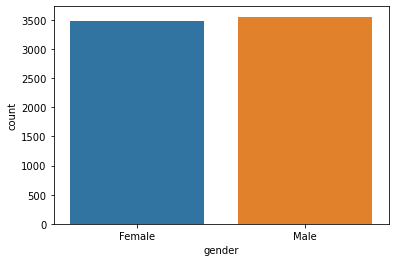

     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
##########################################


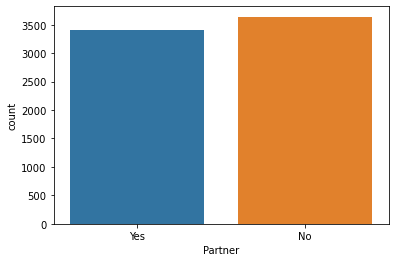

     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
##########################################


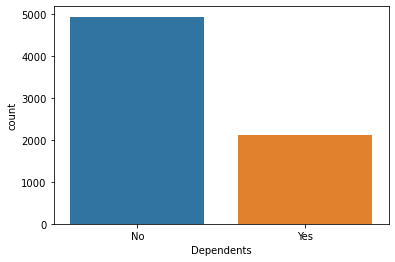

     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
##########################################


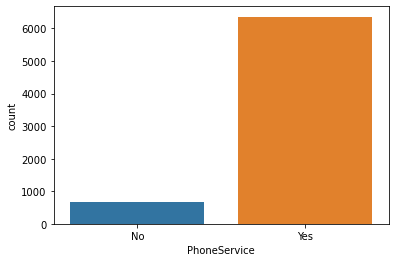

                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


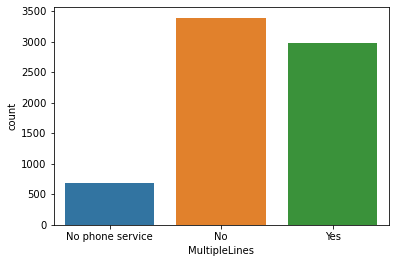

             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
##########################################


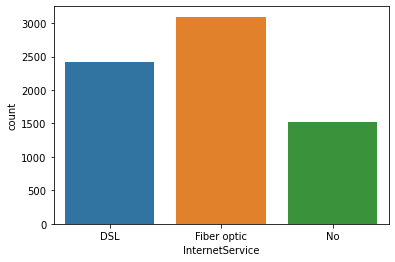

                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


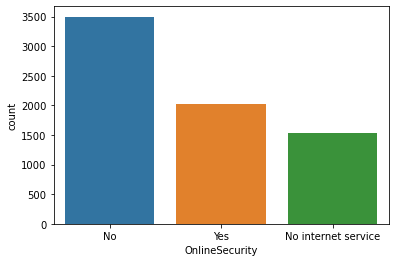

                     OnlineBackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


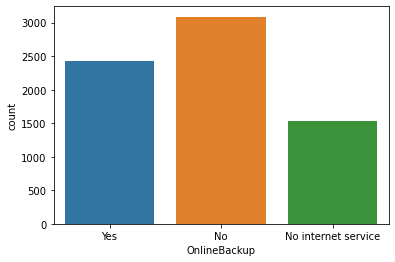

                     DeviceProtection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


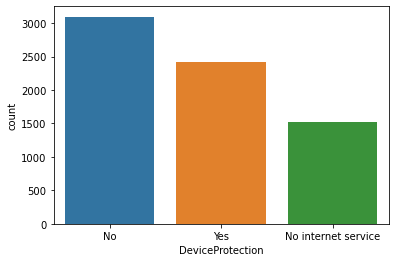

                     TechSupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


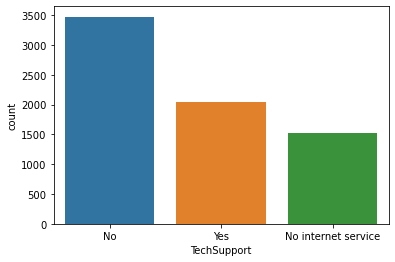

                     StreamingTV  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


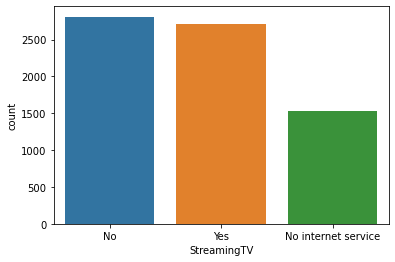

                     StreamingMovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


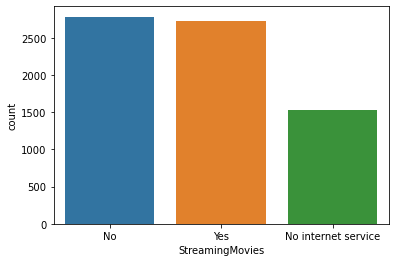

                Contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


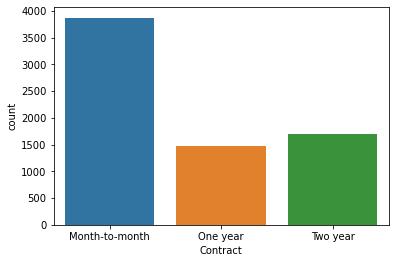

     PaperlessBilling  Ratio
Yes              4171 59.222
No               2872 40.778
##########################################


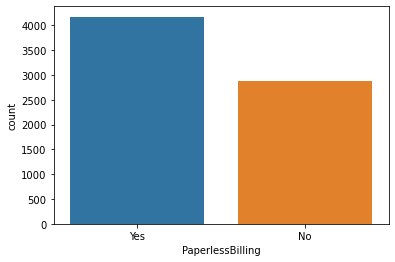

                           PaymentMethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


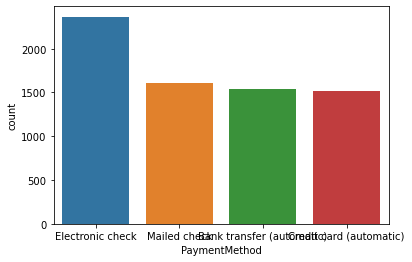

     Churn  Ratio
No    5174 73.463
Yes   1869 26.537
##########################################


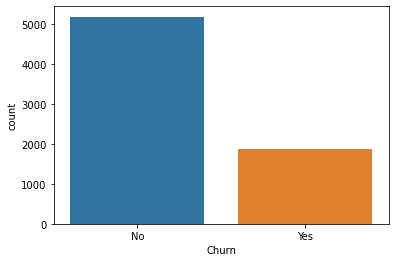

   SeniorCitizen  Ratio
0           5901 83.785
1           1142 16.215
##########################################


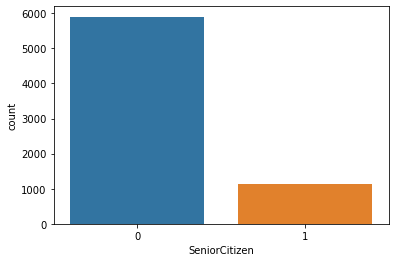

In [11]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [12]:
# Since Churn is our target variable, we need to convert it into 1,0 binary variable to analyze our data.

df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [13]:
df[num_cols].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,95%,99%,max
tenure,7043.000,32.371,24.559,0.000,1.000,2.000,9.000,29.000,55.000,72.000,72.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,19.650,20.050,35.500,70.350,89.850,107.400,114.729,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,49.605,84.600,401.450,1397.475,3794.738,6923.590,8039.883,8684.800


In [14]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


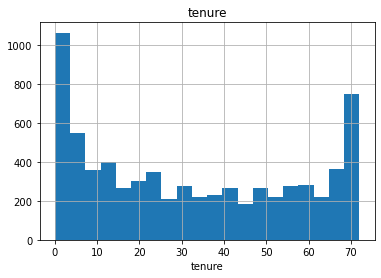

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


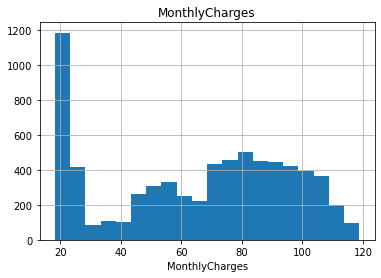

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


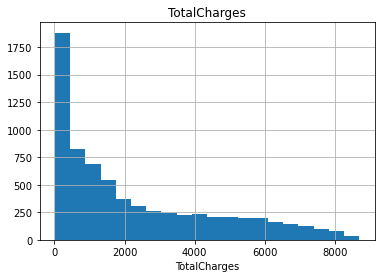

In [15]:
for col in num_cols:
    num_summary(df, col, plot=True)

# Target Value Analysis
Our target value is Churn

In [16]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")
    
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

gender
        TARGET_MEAN  Count  Ratio
Female        0.269   3488 49.524
Male          0.262   3555 50.476


Partner
     TARGET_MEAN  Count  Ratio
No         0.330   3641 51.697
Yes        0.197   3402 48.303


Dependents
     TARGET_MEAN  Count  Ratio
No         0.313   4933 70.041
Yes        0.155   2110 29.959


PhoneService
     TARGET_MEAN  Count  Ratio
No         0.249    682  9.683
Yes        0.267   6361 90.317


MultipleLines
                  TARGET_MEAN  Count  Ratio
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


InternetService
             TARGET_MEAN  Count  Ratio
DSL                0.190   2421 34.375
Fiber optic        0.419   3096 43.959
No                 0.074   1526 21.667


OnlineSecurity
                     TARGET_MEAN  Count  Ratio
No                         0.418   3498 49.666
No internet service        0.074   1526 21.667
Yes                        0.146   2019 28.667


O

# Outliers Analysis

In [17]:
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name, q1=0.10, q3=0.90):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


No outliers, no need to take an action.

# Missing Values Analysis


In [18]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
    
missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11  0.160


['TotalCharges']

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


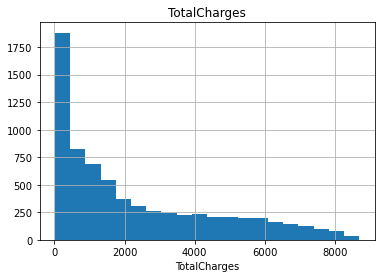

In [19]:
num_summary(df, "TotalCharges", plot=True)

Because the graph is skewed, it is better to fill null values of TotalCharges with median.

In [20]:
missing_values_table(df, "TotalCharges")

              n_miss  ratio
TotalCharges      11  0.160


['TotalCharges']

In [21]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Base Model
Let's examine our model results before taking any actions.

In [22]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in "Churn"]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [23]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [24]:
y = dff["Churn"]
X = dff.drop(["Churn","customerID","TotalCharges"], axis=1)              # TotalCharges içerisinde missing value olduğundan modeli çalıştırdığımızda anlamlı bir değişken olduğu için çalışmayacaktı, sokmadık

models = [('LR', LogisticRegression(random_state=46)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=46)),
          ('RF', RandomForestClassifier(random_state=46)),
          ('SVM', SVC(gamma='auto', random_state=46)),
          ('XGB', XGBClassifier(random_state=46)),
          ("LightGBM", LGBMClassifier(random_state=46))
          #,("CatBoost", CatBoostClassifier(verbose=False, random_state=46))
          ]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

C:\Users\Ugur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ugur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

########## LR ##########
Accuracy: 0.8009
Auc: 0.8434
Recall: 0.5415
Precision: 0.6497
F1: 0.5904
########## KNN ##########
Accuracy: 0.7698
Auc: 0.78
Recall: 0.5158
Precision: 0.5747
F1: 0.5432
########## CART ##########
Accuracy: 0.7363
Auc: 0.6666
Recall: 0.5142
Precision: 0.5044
F1: 0.5088
########## RF ##########
Accuracy: 0.7899
Auc: 0.819
Recall: 0.4858
Precision: 0.6378
F1: 0.5513
########## SVM ##########
Accuracy: 0.7931
Auc: 0.7827
Recall: 0.4596
Precision: 0.659
F1: 0.5407
########## XGB ##########
Accuracy: 0.7872
Auc: 0.8238
Recall: 0.5212
Precision: 0.6185
F1: 0.5652
########## LightGBM ##########
Accuracy: 0.7954
Auc: 0.8366
Recall: 0.5217
Precision: 0.642
F1: 0.5752


# Feature Engineering

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


Customer ID is an unnecessary column.

In [26]:
df.drop("customerID", inplace=True, axis=1)

Creating new variables.

In [27]:
df["New_Add_Tech_Support"] = (df[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]] == "Yes").sum(axis=1)

In [28]:
df.loc[(df["StreamingMovies"] == "Yes") | (df["StreamingTV"] == "Yes"), "New_any_StreamingServices"] = "Yes"
df.loc[(df["StreamingMovies"] == "No") & (df["StreamingTV"] == "No"), "New_any_StreamingServices"] = "No"

In [29]:
df.loc[(df["tenure"] <= 3) & (df["tenure"] >= 0), "New_SubType"] = "new_sub"
df.loc[(df["tenure"] <= 12) & (df["tenure"] > 3), "New_SubType"] = "interested_sub"
df.loc[(df["tenure"] <= 36) & (df["tenure"] > 12), "New_SubType"] = "long_sub"
df.loc[(df["tenure"] <= 72) & (df["tenure"] > 36), "New_SubType"] = "loyal_sub"

In [30]:
df["New_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in
                                                                    ["Credit card (automatic)", "Bank transfer (automatic)"] else 0)

In [31]:
df["New_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 0.01)

In [32]:
df["New_AVG_Increase"] = df["MonthlyCharges"] / (df["MonthlyCharges"] + 1)

In [33]:
df["New_AVG_AddServices"] = df["MonthlyCharges"] / (df["New_Add_Tech_Support"] + 0.1)

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_Add_Tech_Support,New_any_StreamingServices,New_SubType,New_AutoPayment,New_AVG_Charges,New_AVG_Increase,New_AVG_AddServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,1,No,new_sub,0,29.554,0.968,27.136
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2,No,long_sub,0,55.557,0.983,27.119
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,2,No,new_sub,0,53.806,0.982,25.643
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3,No,loyal_sub,1,40.896,0.977,13.645
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0,No,new_sub,0,75.448,0.986,707.000


In [35]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 27
cat_cols: 21
num_cols: 6
cat_but_car: 0
num_but_cat: 4


In [36]:
cat_cols = [col for col in cat_cols if col not in ["Churn", "New_Add_Tech_Support"]]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'New_any_StreamingServices',
 'New_SubType',
 'SeniorCitizen',
 'New_AutoPayment']

In [37]:
binary_cols = [col for col in cat_cols if df[col].dtype == "O" and df[col].nunique() == 2]
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'New_any_StreamingServices']

In [38]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    df = label_encoder(df, col)

In [39]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [40]:
df.isnull().sum().sort_values(ascending=False)

tenure                                   0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_1                       0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
New_any_StreamingServices_1              0
New_any_StreamingServices_2              0
New_SubType_long_sub                     0
New_SubType_loyal_sub                    0
New_SubType_new_sub                      0
SeniorCitizen_1                          0
TechSupport_No internet service          0
DeviceProtection_No internet service     0
MonthlyCharges                           0
OnlineBackup_Yes                         0
TotalCharge

# Modeling

In [41]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,New_Add_Tech_Support,New_AVG_Charges,New_AVG_Increase,New_AVG_AddServices,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,New_any_StreamingServices_1,New_any_StreamingServices_2,New_SubType_long_sub,New_SubType_loyal_sub,New_SubType_new_sub,SeniorCitizen_1,New_AutoPayment_1
0,1,29.850,29.850,0,1,29.554,0.968,27.136,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1,34,56.950,1889.500,0,2,55.557,0.983,27.119,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,2,53.850,108.150,1,2,53.806,0.982,25.643,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,45,42.300,1840.750,0,3,40.896,0.977,13.645,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2,70.700,151.650,1,0,75.448,0.986,707.000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [42]:
y = df["Churn"]
X = df.drop("Churn", axis=1)

In [43]:
models = [('LR', LogisticRegression(random_state=46)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=46)),
          ('RF', RandomForestClassifier(random_state=46)),
          ('SVM', SVC(gamma='auto', random_state=46)),
          ('XGB', XGBClassifier(random_state=46)),
          ("LightGBM", LGBMClassifier(random_state=46))
          #,("CatBoost", CatBoostClassifier(verbose=False, random_state=46))
          ]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

C:\Users\Ugur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ugur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

########## LR ##########
Accuracy: 0.798
Auc: 0.8343
Recall: 0.5099
Precision: 0.6532
F1: 0.5725
########## KNN ##########
Accuracy: 0.7704
Auc: 0.7618
Recall: 0.4537
Precision: 0.5891
F1: 0.5122
########## CART ##########
Accuracy: 0.7271
Auc: 0.6553
Recall: 0.4987
Precision: 0.487
F1: 0.4924
########## RF ##########
Accuracy: 0.7926
Auc: 0.8263
Recall: 0.4901
Precision: 0.6441
F1: 0.5564
########## SVM ##########
Accuracy: 0.7598
Auc: 0.7005
Recall: 0.175
Precision: 0.6896
F1: 0.2783
########## XGB ##########
Accuracy: 0.7859
Auc: 0.8258
Recall: 0.4965
Precision: 0.6221
F1: 0.5517
########## LightGBM ##########
Accuracy: 0.7987
Auc: 0.8361
Recall: 0.5292
Precision: 0.6493
F1: 0.5828


Random Forest:

In [47]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [51]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8],
             "max_features": [3, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [100, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

rf_best_grid.best_params_

rf_best_grid.best_score_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [56]:
rf_best_grid.best_score_

0.8002275348409575

In [57]:
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.8003660944551901

In [58]:
cv_results['test_f1'].mean()

0.5668235172225795

In [59]:
cv_results['test_roc_auc'].mean()

0.8444193532859167

# Feature of Importance

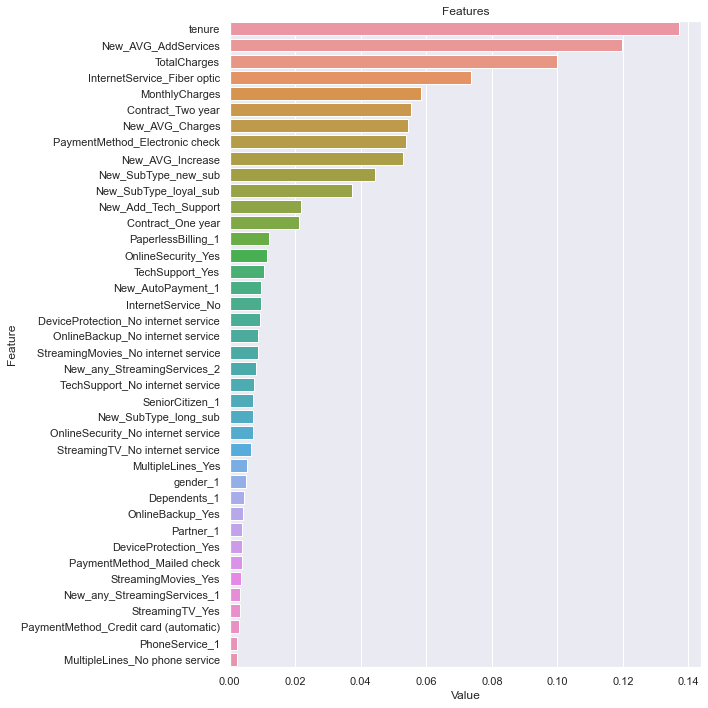

In [62]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)